# Part 1 of the projects, GMRF approach

## Load in the data and load libraries

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from matlab_functions import stencil2prec, parula_map
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sksparse.cholmod import cholesky as cholesky_sparse
from scipy.sparse.linalg import spsolve
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matlab_functions import *
from Part_1_funcs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(215, 126)


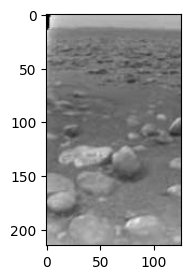

In [7]:
image_name = "titan.jpg"
image = Image.open(image_name)
data = np.array(image).astype(np.double)
max = data.max()
min = data.min()
data = data / max
print(data.shape)
data_flat = data.flatten()

plt.imshow(data, cmap="gray")
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
plt.show()

## Experiment setup

In [60]:
# p = percentage of observations to be regarded as seen
p = 0.369
# uo is number of used observations for estimating parameters
uo = 10000
# kappa can be chosen to be different than estimates
kappa_setting = 0.8261546723952738

## Run full experiment

Estimated regression parameters:  [ 4.87846615e-01 -3.39471210e-04  2.52467685e-04]
Estimated variogram parameters (nu_fixed=False):  {'sigma': 8.983884242047644, 'kappa': 2.2186616007448637e-09, 'nu': 0.29432249225699514, 'sigma_e': 0.05348090231276383}


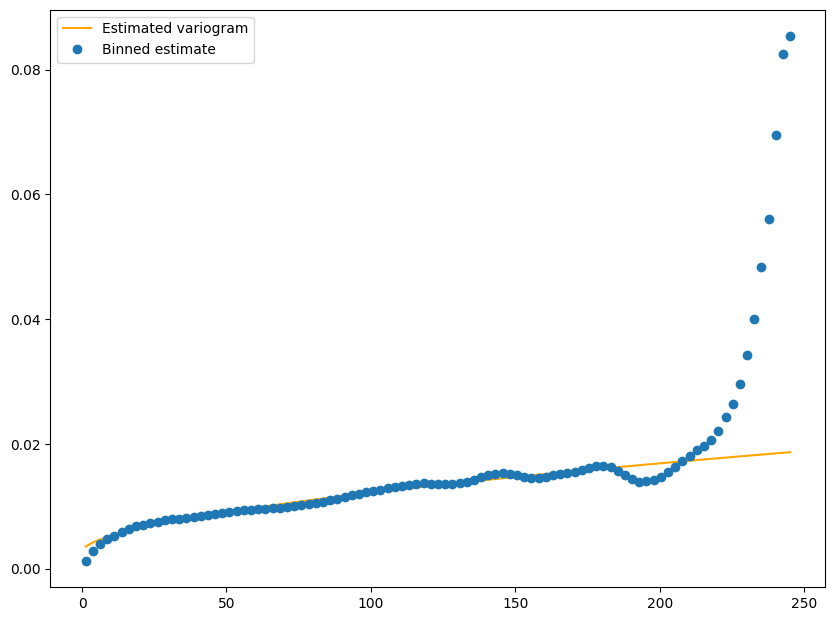

(348764,) (348764,) (348764,)


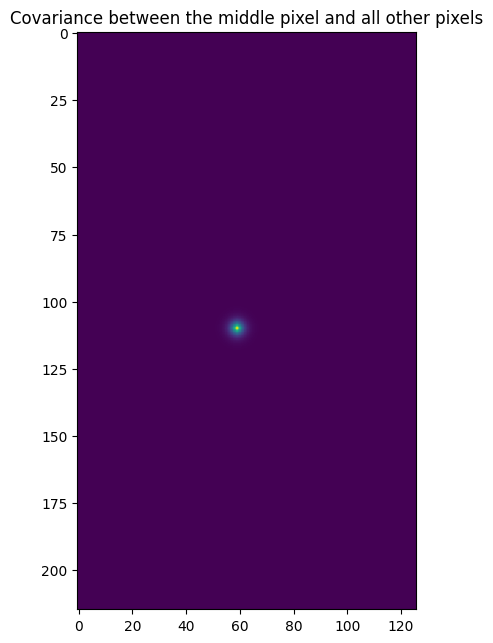

[0.54861189 0.59771789 0.61122532 ... 0.55778468 0.54683856 0.52210713]
--------------------------------------------------
MSE for kappa=0.8261546723952738: 0.0029094778836675924
--------------------------------------------------


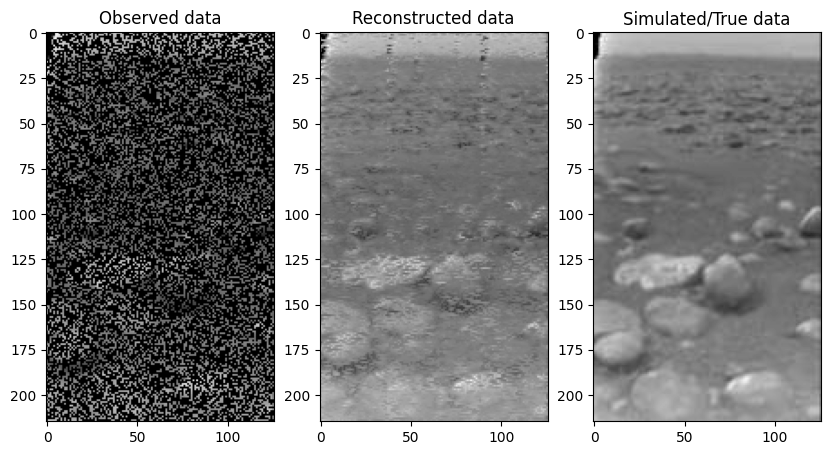

In [61]:
run_reconstruction(
    data=data, 
    p=p, 
    uo=uo, 
    nu_fixed=False,
    show_mid_cov=True, 
    plot_reconstruction=True,
    kappa_setting=kappa_setting,
    )

## Walk through experiment